In [1]:
import pymongo
from pymongo import MongoClient
from datetime import datetime
from pprint import pprint
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings

warnings.filterwarnings('ignore')

In [2]:
client = MongoClient('mongodb://localhost:27017')
db = client['final_work']
house_price = db['house_price']

In [3]:
data1 = pd.read_csv('./data1.csv',encoding='utf-8')
data2 = pd.read_csv('./data2.csv',encoding='utf-8')
data1

,Id,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,GasA,Ex,Y,SBrkr,856,854,0,1710,1,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,GasA,Ex,Y,SBrkr,920,866,0,1786,1,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,GasA,Gd,Y,SBrkr,961,756,0,1717,1,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,GasA,Ex,Y,SBrkr,953,694,0,1647,0,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,GasA,TA,Y,SBrkr,2073,0,0,2073,1,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,GasA,Gd,Y,FuseA,1078,0,0,1078,1,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [4]:
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Gd,TA,No,GLQ,706,Unf,0,150,856,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Gd,TA,Mn,GLQ,486,Unf,0,434,920,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,Gd,No,ALQ,216,Unf,0,540,756,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Gd,TA,Av,GLQ,655,Unf,0,490,1145,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,Gd,TA,No,Unf,0,Unf,0,953,953,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,Gd,TA,No,ALQ,790,Rec,163,589,1542,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,TA,Gd,No,GLQ,275,Unf,0,877,1152,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,142125


In [5]:
data1_dict = data1.to_dict(orient='records')
data2_dict = data2.to_dict(orient='records')
data_dict = data1_dict+ data2_dict
data_dict

[{'Id': 1,
  'Heating': 'GasA',
  'HeatingQC': 'Ex',
  'CentralAir': 'Y',
  'Electrical': 'SBrkr',
  '1stFlrSF': 856,
  '2ndFlrSF': 854,
  'LowQualFinSF': 0,
  'GrLivArea': 1710,
  'BsmtFullBath': 1,
  'BsmtHalfBath': 0,
  'FullBath': 2,
  'HalfBath': 1,
  'BedroomAbvGr': 3,
  'KitchenAbvGr': 1,
  'KitchenQual': 'Gd',
  'TotRmsAbvGrd': 8,
  'Functional': 'Typ',
  'Fireplaces': 0,
  'GarageType': 'Attchd',
  'GarageYrBlt': 2003.0,
  'GarageFinish': 'RFn',
  'GarageCars': 2,
  'GarageArea': 548,
  'GarageQual': 'TA',
  'GarageCond': 'TA',
  'PavedDrive': 'Y',
  'WoodDeckSF': 0,
  'OpenPorchSF': 61,
  'EnclosedPorch': 0,
  '3SsnPorch': 0,
  'ScreenPorch': 0,
  'PoolArea': 0,
  'MiscVal': 0,
  'MoSold': 2,
  'YrSold': 2008,
  'SaleType': 'WD',
  'SaleCondition': 'Normal',
  'SalePrice': 208500},
 {'Id': 2,
  'Heating': 'GasA',
  'HeatingQC': 'Ex',
  'CentralAir': 'Y',
  'Electrical': 'SBrkr',
  '1stFlrSF': 1262,
  '2ndFlrSF': 0,
  'LowQualFinSF': 0,
  'GrLivArea': 1262,
  'BsmtFullBath': 0

In [6]:
X = house_price.insert_many(data_dict)

In [7]:
my_query = {'GrLivArea':{'$gte':4000
                        },
            'SalePrice':{'$lte':300000
                        }
           }
dt1 = house_price.find(my_query)
df1=pd.DataFrame(list(dt1))
drop_ids = list(df1['Id'])
df1

,_id,Id,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64e71ccd221de084c40a5017,524,GasA,Ex,Y,SBrkr,3138,1538,0,4676,...,0,0,0,0,0,10,2007,New,Partial,184750
1,64e71ccd221de084c40a531e,1299,GasA,Ex,Y,SBrkr,4692,950,0,5642,...,0,0,0,480,0,1,2008,New,Partial,160000


In [8]:
my_query0 = {'Id':{'$in': drop_ids
                   }
            }
result0 = house_price.delete_many(my_query0)

In [9]:
my_query1 = [{'$group':{
                       '_id':'$Street',
                       'total':{'$sum':'$SalePrice'},
                       'avg':{'$avg':'$SalePrice'}
                        }
             }
            ]
results1 = house_price.aggregate(my_query1)
for result in results1:
    if result['_id'] == 'Pave':
        total_pave = result['total']
        avg_pave = result['avg']
    elif result['_id'] == 'Grvl':
        total_grvl = result['total']
        avg_grvl = result['avg']
print('avg_pave:',avg_pave)
print('avg_grvl:',avg_grvl)

avg_pave: 181142.59848484848
avg_grvl: 130190.5


In [10]:
my_query2 = [{'$project':{
                        'totalsf':{'$add':['$1stFlrSF','$2ndFlrSF']}
                        }
              }
            ]

results2 = house_price.aggregate(my_query2)
totalsfs = [result['totalsf']  if result['totalsf'] !=None else 0 for result in results2]

In [11]:
my_query3 = [{'$addFields': {
                            'MSZoning': {'$toInt': '$MSZoning'},
                            'LotShape': {'$toInt': '$LotShape'},
                            'LandContour':{'$toInt': '$LandContour'},
                            'MSSubClass':{'$toString':'$MSSubClass'},
                            'OverallQual':{'$toString':'$OverallQual'}
                            }
             }
            ]
house_price.aggregate(my_query3)

In [12]:
my_query4 = [{
              '$match': {'LotShape': 'Reg'}
              },
             {
              '$project': {
                            'LotFrontage': 1,
                            'LotArea': 1,
                            'LandContour': 1
                    }
              }
]
results4 = house_price.aggregate(my_query4)
lotfrontages = [result['LotFrontage'] for result in results4]
lotareas = [result['LotArea'] for result in results4]
landcontours = [result['LandContour'] for result in results4]

In [13]:
m = np.mean(lotfrontages)
my_query5 = { 'LotFrontage': None}
new_values = { '$set': { 'LotFrontage': m } }
results5 = house_price.update_many(my_query5,new_values)

In [14]:
res = house_price.find()
df = pd.DataFrame(list(res))
df

,_id,Id,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,64e71ccd221de084c40a4e0c,1,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64e71ccd221de084c40a4e0d,2,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64e71ccd221de084c40a4e0e,3,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64e71ccd221de084c40a4e0f,4,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64e71ccd221de084c40a4e10,5,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,64e71ccd221de084c40a596f,1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0
2912,64e71ccd221de084c40a5970,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0
2913,64e71ccd221de084c40a5971,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0
2914,64e71ccd221de084c40a5972,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1029.0,0.0,1078.0


In [16]:
data1_processed = df[:1458]
data2_processed = df[1458:]
data1_processed = data1_processed.iloc[:,:40]
data2_processed = data2_processed.iloc[:,39:]
data1_processed = data1_processed.drop(data1_processed.columns[0],axis=1)
data1_processed

,Id,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500
1,2,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500
2,3,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500
3,4,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000
4,5,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1456,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,175000
1454,1457,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal,210000
1455,1458,GasA,Ex,Y,SBrkr,1188.0,1152.0,0.0,2340.0,0.0,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal,266500
1456,1459,GasA,Gd,Y,FuseA,1078.0,0.0,0.0,1078.0,1.0,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,142125


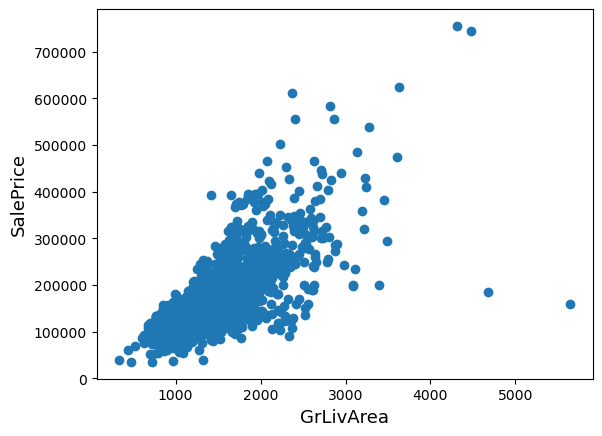

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = data1['GrLivArea'], y = data1['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

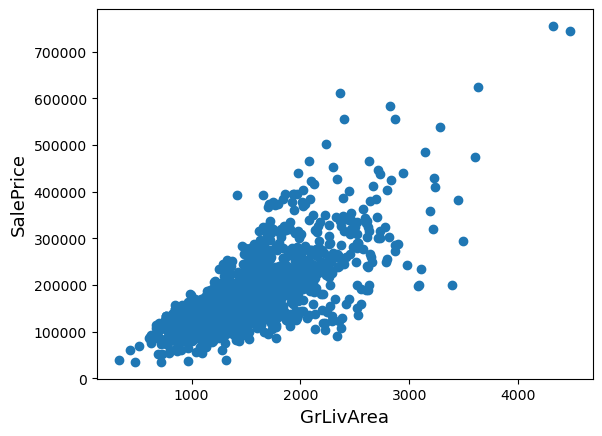

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = data1_processed['GrLivArea'], y = data1_processed['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

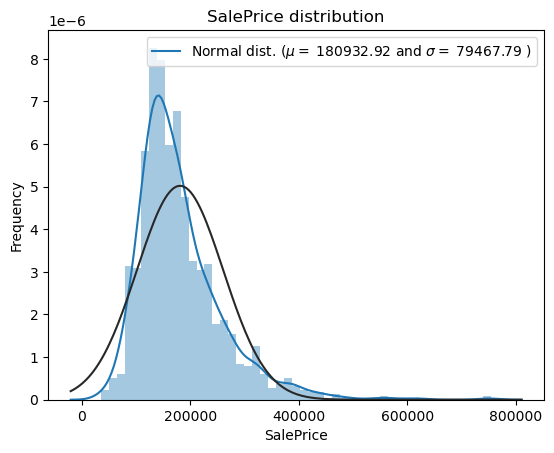

In [19]:
sns.distplot(data1_processed['SalePrice'] , fit=norm);
 
(mu, sigma) = norm.fit(data1_processed['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

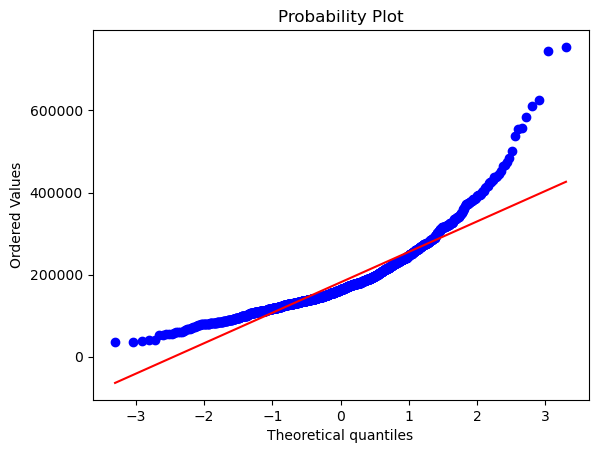

In [20]:
res = stats.probplot(data1_processed['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



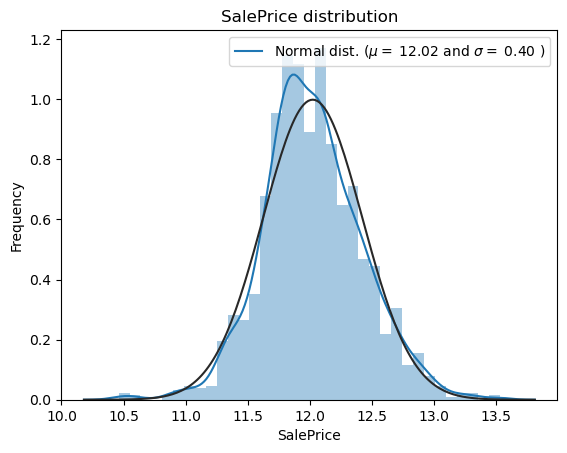

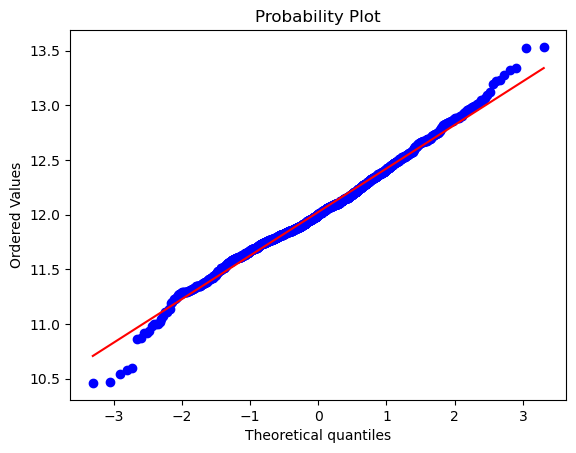

In [21]:
data1_processed["SalePrice"] = np.log1p(data1_processed["SalePrice"])
sns.distplot(data1_processed['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(data1_processed['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(data1_processed['SalePrice'], plot=plt)
plt.show()

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

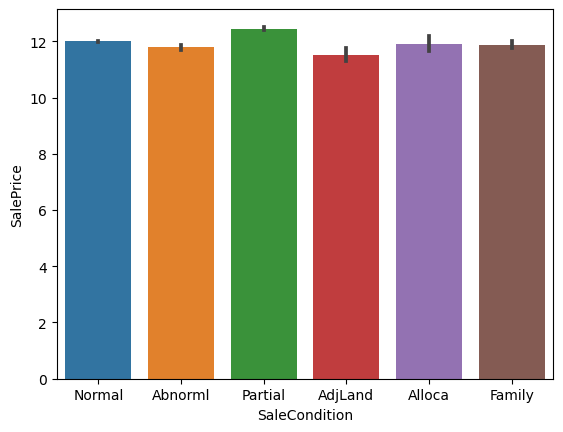

In [22]:
sns.barplot(x="SaleCondition", y="SalePrice", data=data1_processed)

<Axes: xlabel='Heating', ylabel='SalePrice'>

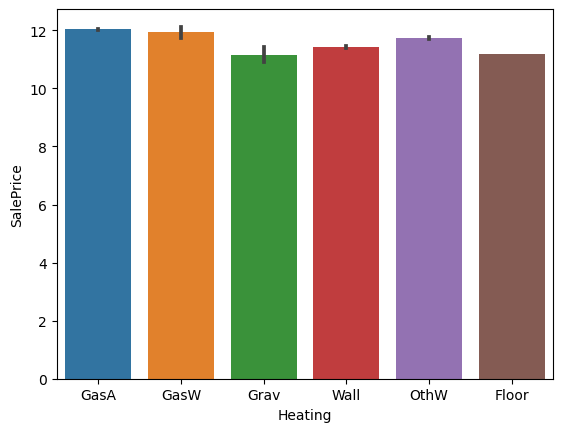

In [23]:
sns.barplot(x="Heating", y="SalePrice", data=data1_processed)

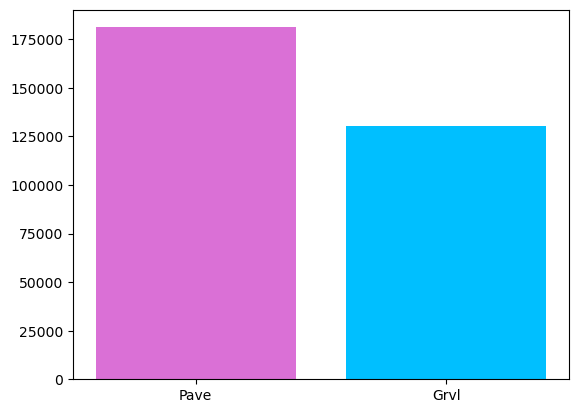

In [24]:
x=[1,2] 
y=[avg_pave,avg_grvl]  

color=['orchid','deepskyblue']
x_label=['Pave','Grvl']
plt.xticks(x, x_label)  
plt.bar(x, y,color=color)  

plt.show()

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

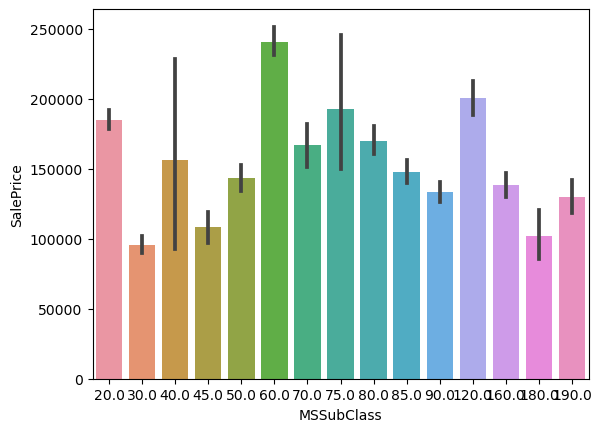

In [25]:
sns.barplot(x="MSSubClass", y="SalePrice", data=data2_processed)

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

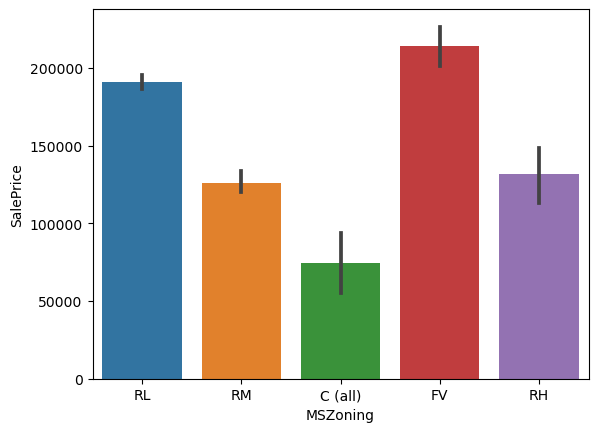

In [26]:
sns.barplot(x="MSZoning", y="SalePrice", data=data2_processed)

<Axes: xlabel='LotShape', ylabel='SalePrice'>

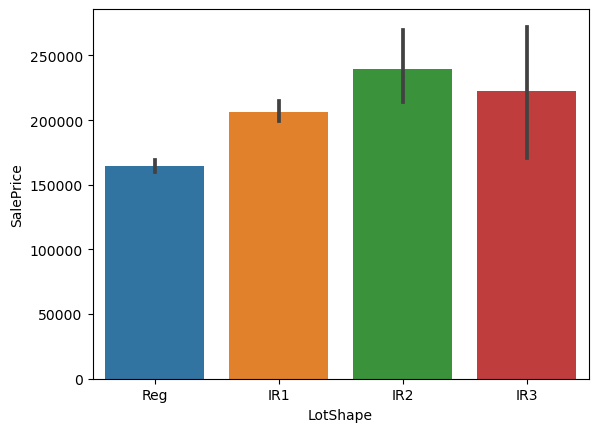

In [27]:
sns.barplot(x="LotShape", y="SalePrice", data=data2_processed)